# Ejercicios de ilustración método de transformada inversa y aceptación y rechazo

In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

### Ilustración método de la transformada inversa con paquete `stats`

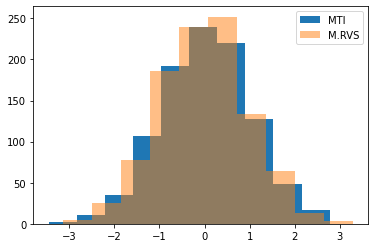

In [13]:
plt.hist(st.norm.ppf(np.random.rand(1000)), label='MTI')
plt.hist(st.norm.rvs(size=1000), label='M.RVS', alpha=0.5)
plt.legend()


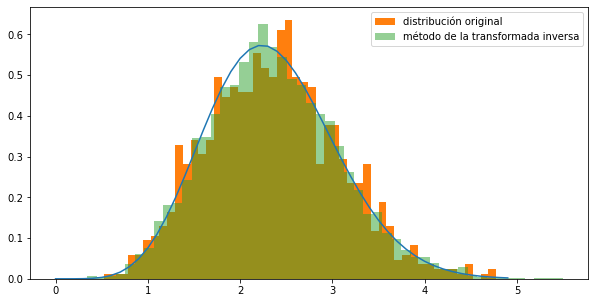

In [31]:
# Elegir la distribución
name_dist = 'chi'
# Explorar la función de la función getattr
dist = getattr(st, name_dist)
# Parametros de la distribución (tupla)
params = (4, 0, 1)
# Cantidad de términos
N = 5000
# Diccionario de argumentos de la distribución
args = {'df': 6, 'loc': 0, 'scale': 1}

# Generación de variable aleatorias de la distrubición elegida
x = dist(**args).rvs(size=1000)

# Comparación de histogramas
# 1. Histograma distribución original
plt.figure(figsize=[10,5])
plt.plot(np.arange(0, 5, 0.1),  dist(**args).pdf(np.arange(0, 5, 0.1)))

plt.hist(x, bins=50, density=True, label='distribución original');

# 2. Implementación del método de la transformada inversa usando función 'ppf'
U = np.random.rand(N)
f_inv = dist(**args).ppf(U)
plt.hist(f_inv, bins=50, density=True, label='método de la transformada inversa', alpha=0.5);
plt.legend()

## <font color ='red'> **Ejercicio 2** 
 1. Generación variable aleatoria continua

$$
h(x)=
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
2-x, & 1\le x \le 2 \\
0,& x>2
\end{cases}
$$

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $h(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Método de la transformada inversa

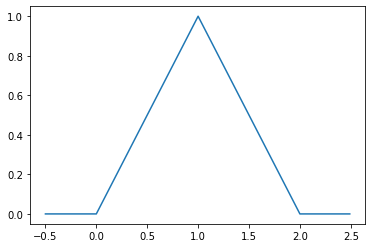

In [46]:
h = lambda x: 0 if x < 0 else (x if 0 < x < 1 else (2 - x if 1 <= x <= 2 else 0))

x = np.arange(-0.5, 2.5, 0.01)
plt.plot(x, [h(xi) for xi in x])

(array([0.07740119, 0.06192095, 0.0980415 , 0.18576285, 0.19608301,
        0.24252372, 0.27348419, 0.32508498, 0.36636562, 0.33024506,
        0.32508498, 0.47988736, 0.52632807, 0.50052767, 0.56244862,
        0.53664823, 0.65016997, 0.82045258, 0.76369171, 0.82045258,
        0.84625297, 0.84109289, 1.02685574, 1.18165811, 1.09909685,
        1.02685574, 0.87721345, 0.93397432, 0.90301384, 0.80497234,
        0.70693084, 0.79465218, 0.72241107, 0.60888933, 0.52632807,
        0.5934091 , 0.50052767, 0.59856917, 0.41796641, 0.36636562,
        0.33540514, 0.37668577, 0.30960475, 0.26316403, 0.25284388,
        0.26832411, 0.16512253, 0.11352174, 0.12900198, 0.06708103]),
 array([0.02546544, 0.06422454, 0.10298363, 0.14174273, 0.18050182,
        0.21926092, 0.25802002, 0.29677911, 0.33553821, 0.3742973 ,
        0.4130564 , 0.45181549, 0.49057459, 0.52933369, 0.56809278,
        0.60685188, 0.64561097, 0.68437007, 0.72312917, 0.76188826,
        0.80064736, 0.83940645, 0.87816555, 0.

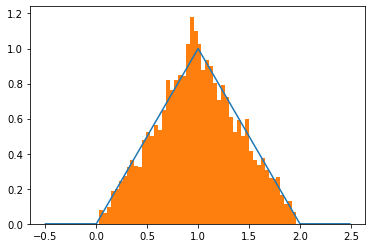

In [52]:
U = np.random.rand(N)

H_inv = lambda u: np.sqrt(2 * u) if 0 <= u <= 0.5 else 2 - np.sqrt(4 - 2 *(1 + u))
H_inv_values = [H_inv(ui) for ui in U]

# Validar función inversa (gráfica)
h = lambda x: 0 if x < 0 else (x if 0 < x < 1 else (2 - x if 1 <= x <= 2 else 0))
plt.plot(x, [h(xi) for xi in x], label='pdf')

plt.hist(H_inv_values, bins=50, density=True, label='MTI')

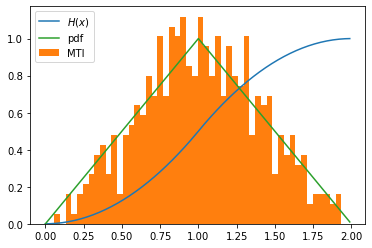

In [54]:
N = 500
# Crear función acumulada
H = lambda x: 0 if x<0 else (x ** 2 / 2 if 0 <= x < 1 else (-x **2 / 2  + 2 * x -1 if 1 <= x <= 2 else 0) )

# Graficar función acumulada
x = np.arange(0, 2, 0.01)
plt.plot(x, [H(xi) for xi in x], label='$H(x)$')

# Crear función inversa
# Vector de aleatorios uniformer
U = np.random.rand(N)

H_inv = lambda u: np.sqrt(2 * u) if 0 <= u <= 0.5 else 2 - np.sqrt(4 - 2 *(1 + u))
# Vector generado con MTI
H_inv_values = [H_inv(ui) for ui in U]

# Validar función inversa (gráfica)

# Graficar histograma aleatorios
plt.hist(H_inv_values, bins=50, density=True, label='MTI')

# Función de densidad h(x)
h = lambda x: 0 if x < 0 else (x if 0 < x < 1 else (2 - x if 1 <= x <= 2 else 0))
plt.plot(x, [h(xi) for xi in x], label='pdf')

plt.legend();

### Método de aceptación y rechazo

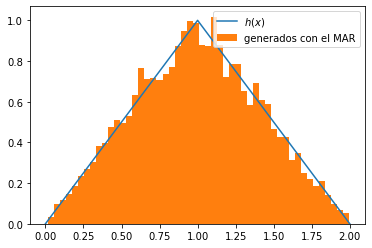

In [53]:
N = 100

# Graficar densidad de probabilidad h(x)

# Programar método de aceptación y rechazo

# Graficar puntos aceptados

# Almacenar números aceptados en una variable y graficar su histograma


## Ejercicio 3
Suponga que tiene la siguiente probability mass function 
$$
P(X=k) = 
\begin{cases} 
\frac{1}{3}\left( \frac{2}{3}\right)^{k-1}, & \text{si } k=1, 2, \cdots \\
0, & \text{otro caso}
\end{cases}
$$

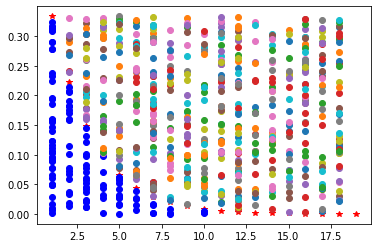

In [71]:
N = 700
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

# Gráfica de pmf
k = np.arange(1, 20)
plt.plot(k, p(k), 'r*')

# Método de aceptación rechazo discreto
max_p = p(1)
